# Exploratory Data Dnalysis World Cup Qatar Tweets  
- ### Collect data from Twitter
- ### Understanding the data
    - shape of the data
    - check column dtypes
    - check is there any null values
- ### Extract user mentioneds
- ### Top 20 most mentiond users
- ### Most tweets belongs to who ?
- ### Min and Max and Mean Retweet Count
- ### Min and Max and Mean Followers Count and Friends Count
- ### Which device are the most tweets done with ?
- ### Find accounts that created when world cup started
    - How many accounts were created during the World Cup ?
    - What's the language of recent accounts ? 
    - What places did they tweet from the most ?
    - Most used source for tweeting ?
    - What was the maximum number of followers they could attract during the World Cup?

In [1]:
# Data reading and pre-processing 
from collections import Counter
import pandas as pd
import numpy as np
import re

# Collecting data
import tweepy

# Data visualization
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from termcolor import cprint
import seaborn as sns
import warnings




# Visualization setup
sns.set(style="darkgrid",color_codes=True)
warnings.filterwarnings('ignore')
%matplotlib inline

# Twitter color palette 
color = ['#55ACEE']

## Collect data from Twitter

In [ ]:
# function to display data of each tweet
def printtweetdata(n, ith_tweet):
        print()
        print(f"Tweet {n}:")
        print(f"Username:{ith_tweet[0]}")
        print(f"Description:{ith_tweet[1]}")
        print(f"Location:{ith_tweet[2]}")
        print(f"Following Count:{ith_tweet[3]}")
        print(f"Follower Count:{ith_tweet[4]}")
        print(f"Total Tweets:{ith_tweet[5]}")
        print(f"Retweet Count:{ith_tweet[6]}")
        print(f"Tweet Text:{ith_tweet[7]}")
        print(f"Hashtags Used:{ith_tweet[8]}")
 
 
# function to perform data extraction
def scrape(words, world_cup, numtweet):
 
        # Creating DataFrame using pandas
        db = pd.DataFrame(columns=[
                                   'name',
                                   'screen_name',
                                   'location',
                                   'followers_count',
                                   'friends_count',
                                   'account_created_at',
                                   'created_at',
                                   'full_text',
                                   'source',
                                   'lang'])
 
        # We are using .Cursor() to search
        # through twitter for the required tweets.
        # The number of tweets can be
        # restricted using .items(number of tweets)
        tweets = tweepy.Cursor(api.search_tweets,
                               words, lang="en",
                               since_id=world_cup,
                               tweet_mode='extended').items(numtweet)
 
 
        # .Cursor() returns an iterable object. Each item in
        # the iterator has various attributes
        # that you can access to
        # get information about each tweet
        list_tweets = [tweet for tweet in tweets]
 
        # Counter to maintain Tweet Count
        i = 1
 
        # we will iterate over each tweet in the
        # list for extracting information about each tweet
        for tweet in list_tweets:
                name = tweet.user.name
                screen_name = tweet.user.screen_name
                source = tweet.source
                location = tweet.user.location
                name = tweet.user.name
                created_at = tweet.created_at
                account_created_at = tweet.user.created_at
                followers = tweet.user.followers_count
                friends_count = tweet.user.friends_count
                retweetcount = tweet.retweet_count
                hashtags = tweet.entities['hashtags']
 
                # Retweets can be distinguished by
                # a retweeted_status attribute,
                # in case it is an invalid reference,
                # except block will be executed
                try:
                        text = tweet.retweeted_status.full_text
                except AttributeError:
                        text = tweet.full_text
                hashtext = list()
                for j in range(0, len(hashtags)):
                        hashtext.append(hashtags[j]['text'])
 
                # Here we are appending all the
                # extracted information in the DataFrame
                ith_tweet = [name,screen_name, location,
                             followers_count, friends_count,
                             account_created_at, created_at,
                             full_text, source, retweetcount,lang]
                db.loc[len(db)] = ith_tweet
 
                # Function call to print tweet data on screen
                printtweetdata(i, ith_tweet)
                i = i+1
        filename = 'twtdata.com_tweets_by_hashtag_Fifa_Xd8b0u2i9n.csv'
 
        # we will save our database as a CSV file.
        db.to_csv(filename)
 
if __name__ == '__main__':
 
        # Enter your own credentials obtained
        # from your developer account
        consumer_key = "XXXXXXXXXXXXXXXXXXXXX"
        consumer_secret = "XXXXXXXXXXXXXXXXXXXXX"
        access_key = "XXXXXXXXXXXXXXXXXXXXX"
        access_secret = "XXXXXXXXXXXXXXXXXXXXX"
 
 
        auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
        auth.set_access_token(access_key, access_secret)
        api = tweepy.API(auth)
 
        # Enter Hashtag and initial date
        print("Enter Twitter HashTag to search for")
        words = input()
        print("Enter World Cup The Tweets are required in yyyy-mm--dd")
        world_cup = input()
 
        # number of tweets you want to extract in one run
        numtweet = 100000
        scrape(words, world_cup, numtweet)
        print('Scraping has completed!')

## Loading the data

In [2]:
df = pd.read_csv('twtdata.com_tweets_by_hashtag_Fifa_Xd8b0u2i9n.csv')

## Understanding the data
- shape of the data
- check column dtypes
- check is there any null values

In [3]:
print("Shape of the data :",df.shape)
cprint('*'*42,'blue')  
df.head()

Shape of the data : (99014, 23)
******************************************


,name,screen_name,location,followers_count,friends_count,account_created_at,created_at,id,full_text,truncated,...,in_reply_to_screen_name,geo,coordinates,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,lang
0,Roberto Surur,RobertoSur5,Ciudad del Libertador General,362,28,2018-10-27 17:11:21,2022-12-11 14:53:20,1601953285145231362,RT @eldestapeweb: 🔴 La FIFA abrió un expedient...,False,...,NaN,NaN,NaN,NaN,False,36,0,False,False,es
1,Daniel,DanielS06423561,Atlantis,122,376,2021-12-10 06:08:24,2022-12-11 14:53:20,1601953284910186496,"RT @estarc62: En el 66 insultando a la reina, ...",False,...,NaN,NaN,NaN,NaN,False,98,0,False,False,es
2,احمد 🇦🇷,i_5U0,صل على نبيّنا محمّد,806,355,2017-11-11 20:08:24,2022-12-11 14:53:20,1601953282754330624,RT @fifacom_ar: عيد ميلاد سعيد لأسطورة @SaudiN...,False,...,NaN,NaN,NaN,NaN,False,215,0,False,False,ar
3,Kevin,Thfckevin1,NaN,333,668,2020-11-10 11:13:10,2022-12-11 14:53:19,1601953281118728195,RT @Blaqqkoffi: Frame 1: What Ghana produced f...,False,...,NaN,NaN,NaN,NaN,False,4029,0,False,False,en
4,Dust_Free_Doug,dust_doug,"Barnet, London",10,87,2022-04-27 23:19:54,2022-12-11 14:53:19,1601953279868649474,RT @AndyHar99612377: @Iromg @fifa I'm not a fo...,False,...,NaN,NaN,NaN,NaN,False,6,0,False,False,en


In [4]:
df.isnull().sum()

name                           0
screen_name                    0
location                   43879
followers_count                0
friends_count                  0
account_created_at             0
created_at                     0
id                             0
full_text                      0
truncated                      0
source                         0
in_reply_to_status_id      84779
in_reply_to_user_id        84516
in_reply_to_screen_name    84517
geo                        99003
coordinates                99003
contributors               99014
is_quote_status                0
retweet_count                  0
favorite_count                 0
favorited                      0
retweeted                      0
lang                           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99014 entries, 0 to 99013
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   name                     99014 non-null  object 
 1   screen_name              99014 non-null  object 
 2   location                 55135 non-null  object 
 3   followers_count          99014 non-null  int64  
 4   friends_count            99014 non-null  int64  
 5   account_created_at       99014 non-null  object 
 6   created_at               99014 non-null  object 
 7   id                       99014 non-null  int64  
 8   full_text                99014 non-null  object 
 9   truncated                99014 non-null  bool   
 10  source                   99014 non-null  object 
 11  in_reply_to_status_id    14235 non-null  float64
 12  in_reply_to_user_id      14498 non-null  float64
 13  in_reply_to_screen_name  14497 non-null  object 
 14  geo                   

## Extract user mentioneds

In [6]:
# Extract names with @ from tweets
df['user_mentioned'] = df['full_text'].apply(lambda x : ' '.join(re.findall("\B@\w+", x)))

In [7]:
# Put all extracted users into a array
all_users = []
for users in df['user_mentioned'].apply(lambda x : x.split(' ')):
    for user in users :
        all_users.append(user)

## Top 20 most mentiond users

In [8]:
most_mentiond =Counter(list(filter(None, all_users))).most_common(20)

In [9]:
dic = {}
for key, value in most_mentiond:
    dic[key] = dic.get(key, 0) + value

In [10]:
my_df = pd.DataFrame(dic.items())

Text(0.5, 1.0, 'Most Mentiond Users')

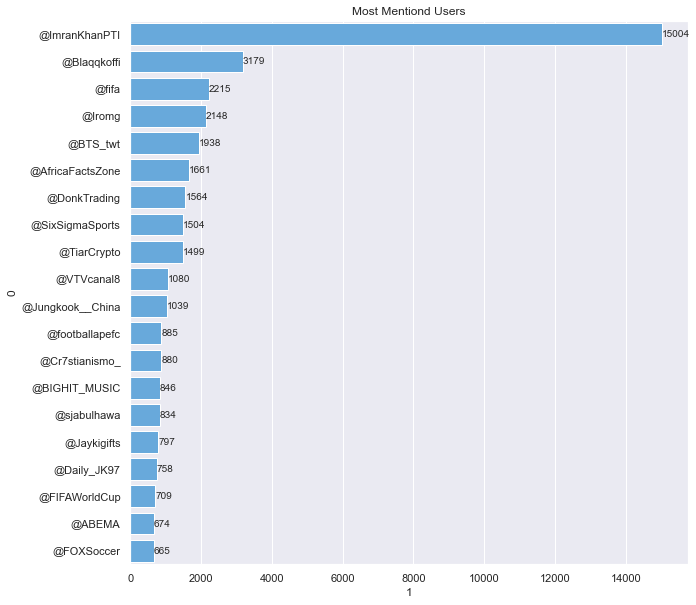

In [44]:
plt.rcParams['figure.figsize'] = (10, 10)

countplot = sns.barplot(x=1, y=0, data=my_df,palette=color)
for container in countplot.containers:
    countplot.bar_label(container)
countplot.set_title('Most Mentiond Users')

In [13]:
df['account_created_at'] = pd.to_datetime(df['account_created_at'], errors='coerce')


## Most tweets belongs to who ? 

In [14]:
value_counts = df['screen_name'].value_counts(dropna=True, sort=True)[:50]

# solution here
df_val_counts = pd.DataFrame(value_counts)
df_value_counts_reset = df_val_counts.reset_index()
df_value_counts_reset.columns = ['screen_name', 'Number of Tweets'] # change column names

Text(0.5, 1.0, 'Most Tweets Belons To')

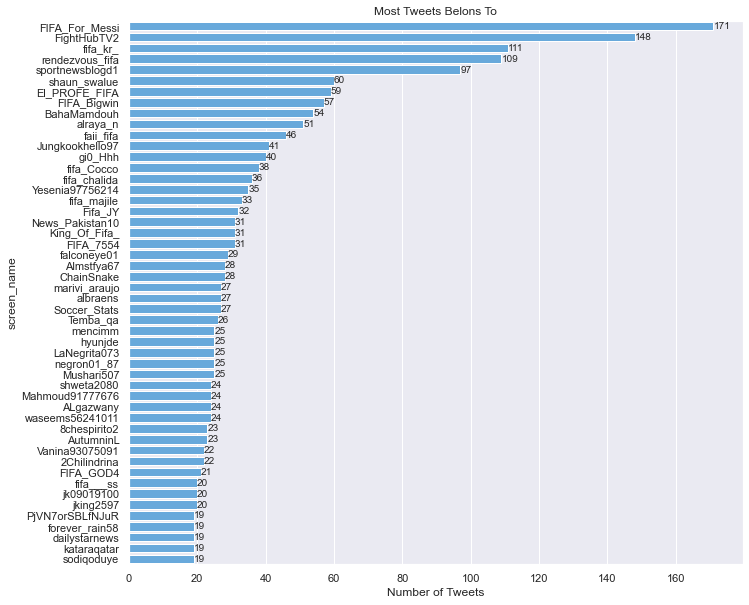

In [45]:
plt.rcParams['figure.figsize'] = (11, 10)
countplot=sns.barplot(y=df_value_counts_reset['screen_name'],x=df_value_counts_reset['Number of Tweets'],palette=color)
for container in countplot.containers:
    countplot.bar_label(container)
countplot.set_title('Most Tweets Belons To')

## In which languages is it tweeted the most ?   

en     58504
es     14653
ja      5034
ar      4407
pt      3966
fr      3699
in      2201
und     1389
de      1101
hi       945
ko       462
th       331
tr       293
it       269
nl       263
tl       168
pl       162
et       125
bn       118
ca       101
ur        93
ta        63
gu        55
ml        54
mr        53
el        43
ht        41
kn        38
sv        38
fi        35
zh        31
ru        27
te        26
no        25
vi        24
fa        22
ne        22
da        19
cs        18
ro        12
cy        12
si        10
is         9
hu         8
or         7
sl         7
lv         7
ckb        6
uk         4
lt         3
pa         3
eu         2
ps         2
iw         1
sr         1
bg         1
dv         1
Name: lang, dtype: int64
**************************************************


Text(0.5, 1.0, 'Most Tweeted Languages')

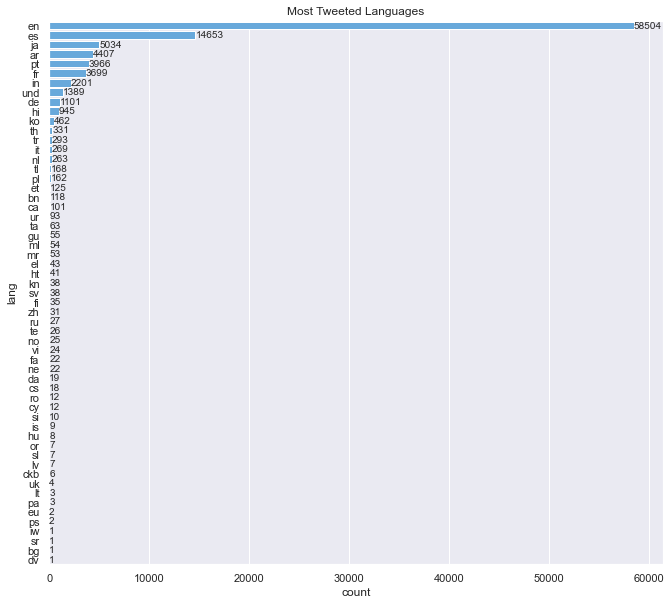

In [46]:
print(df['lang'].value_counts())
cprint('*'*50,'blue')
plt.rcParams['figure.figsize'] = (11, 10)
countplot=sns.countplot(y='lang',data=df,palette=color,order =df['lang'].value_counts().index)
for container in countplot.containers:
    countplot.bar_label(container)
countplot.set_title('Most Tweeted Languages')

## Min and Max and Mean Followers Count and Friends Count

Max Followers Count :  19582658
Mean Followers Count :  26910
Min Followers Count :  0
**************************************************
Max Friends Count :  950403
Mean Friends Count :  1234
Min Friends Count :  0
**************************************************


<AxesSubplot:xlabel='followers_count'>

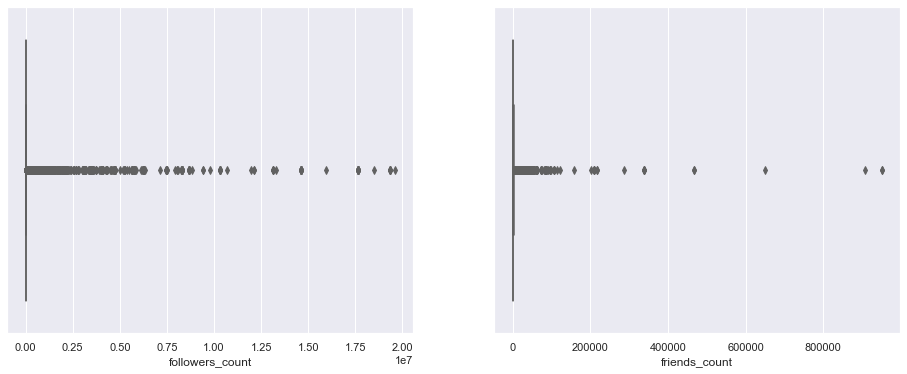

In [17]:
print('Max Followers Count : ',df['followers_count'].max())
print('Mean Followers Count : ',round(df['followers_count'].mean()))
print('Min Followers Count : ',df['followers_count'].min())

cprint('*'*50,'blue')

print('Max Friends Count : ',df['friends_count'].max())
print('Mean Friends Count : ',round(df['friends_count'].mean()))
print('Min Friends Count : ',df['friends_count'].min())

cprint('*'*50,'blue')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
sns.boxplot(x=df["friends_count"],palette=color,ax=axis2)

sns.boxplot(x=df["followers_count"],palette=color,ax=axis1)

## Min and Max and Mean Retweet Count

Max Retweet Count :  377581
Mean Retweet Count :  3372
Min  Retweet Count :  0
**************************************************


<AxesSubplot:xlabel='retweet_count'>

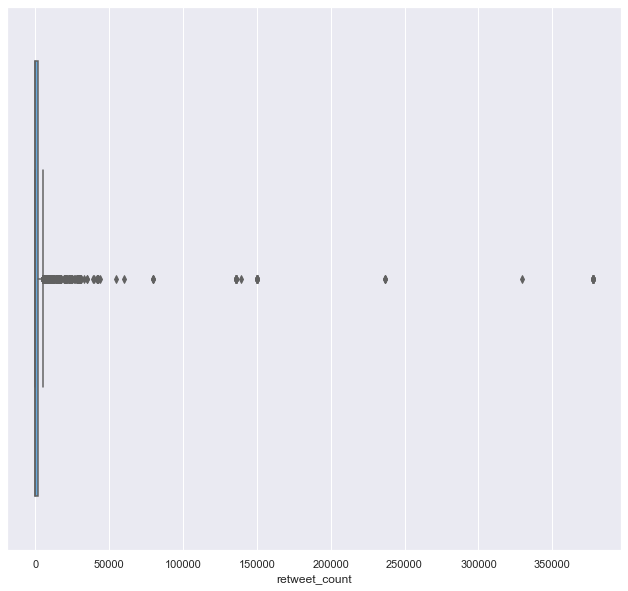

In [18]:
print('Max Retweet Count : ',df['retweet_count'].max())
print('Mean Retweet Count : ',round(df['retweet_count'].mean()))
print('Min  Retweet Count : ',df['retweet_count'].min())

cprint('*'*50,'blue')

sns.boxplot(x=df["retweet_count"],palette=color)

### Which device are the most tweets done with ?

In [19]:
def convert_source(source):
    if "Web" in source :
        return "Web App"
    elif "iPhone" in source:
        return "Iphone"
    else :
        return "Android"

In [20]:
df['source'] = df['source'].apply(lambda x :convert_source(x))

Android    57905
Iphone     27522
Web App    13587
Name: source, dtype: int64
**************************************************


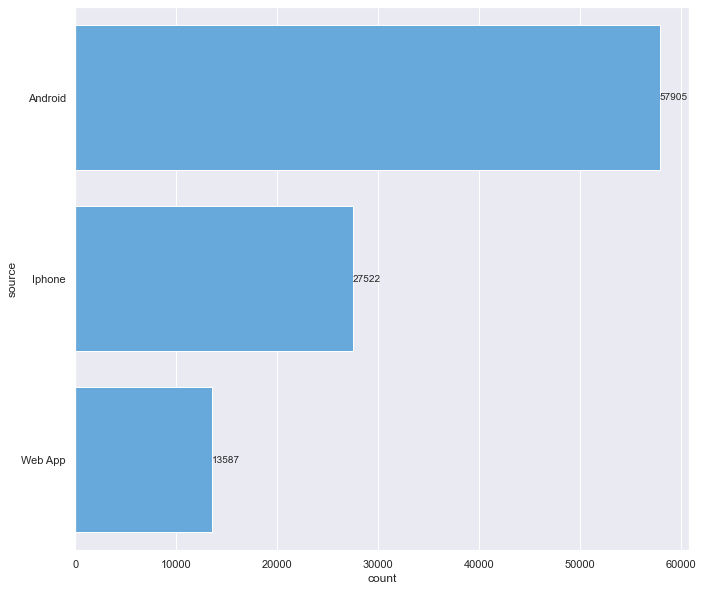

In [36]:
print(df['source'].value_counts())
cprint('*'*50,'blue')
countplot=sns.countplot(y='source',data=df,palette=color,order =df['source'].value_counts().index)
for container in countplot.containers:
    countplot.bar_label(container)

## Most appeared loaction

In [22]:
df['location'] = df['location'].apply(lambda x :str(x))

In [23]:
locations =  df[df['location'] != "nan"]['location']

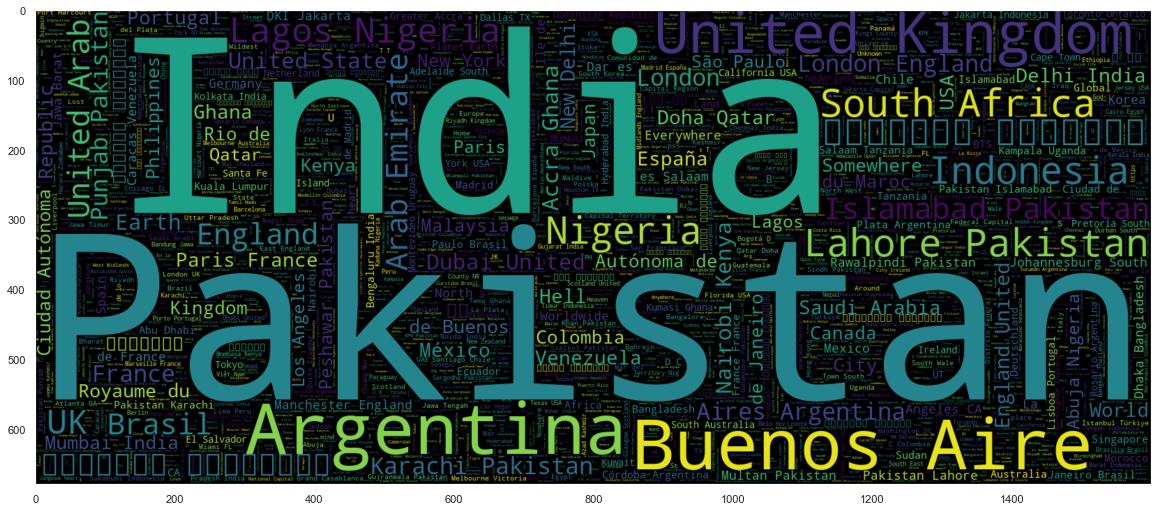

In [39]:
plt.figure(figsize = (20,20)) 
worldcould_tweets = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(locations))
plt.imshow(worldcould_tweets,interpolation = 'bilinear')
plt.grid(None)

### English tweets wordcloud

In [25]:
tweets_english =  df[df['lang'] == 'en']['full_text']

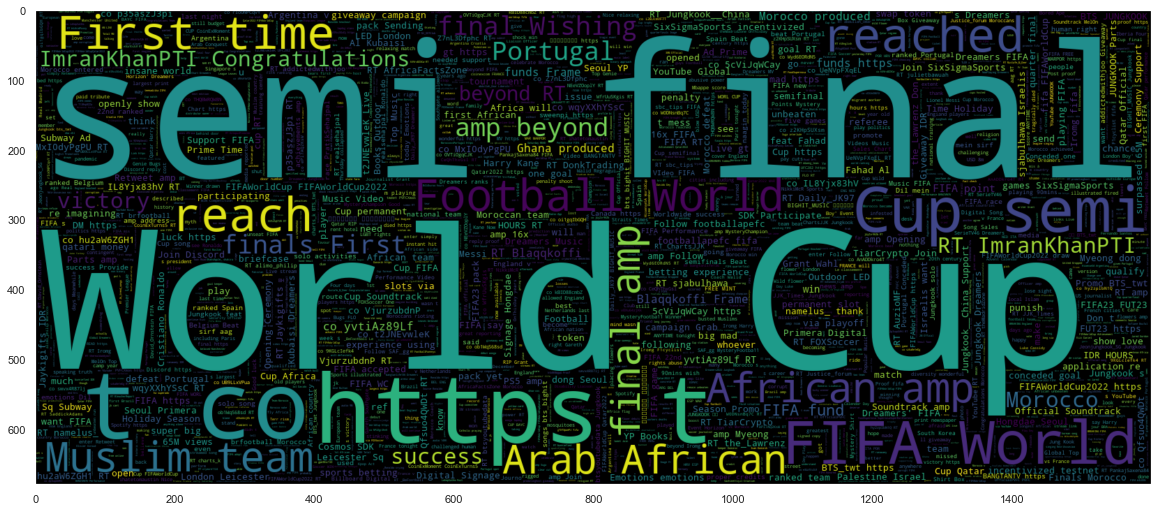

In [26]:
plt.figure(figsize = (20,20)) 
worldcould_bad = WordCloud(min_font_size = 3,  max_words = 3000 , width = 1600 , height = 680).generate(" ".join(tweets_english))
plt.imshow(worldcould_bad,interpolation = 'bilinear')
plt.grid(None)

## Find accounts that created when world cup started
- How many accounts were created during the World Cup ?
- What's the language of recent accounts ? 
- What places did they tweet from the most ?
- Most used source for tweeting ?
- What was the maximum number of followers they could attract during the World Cup?

In [27]:
df_recentAccounts = df[df['account_created_at'].dt.strftime('%Y-%m') >= '2022-11']

### How many accounts were created during the World Cup ?

In [28]:
len(df_recentAccounts)

5281

([<matplotlib.patches.Wedge at 0x186e66d3190>,
 [Text(-1.0845941586180314, 0.1834543842257377, 'Before WordCup'),
  Text(1.0845941500299106, -0.18345443499925498, 'After World Cup')])

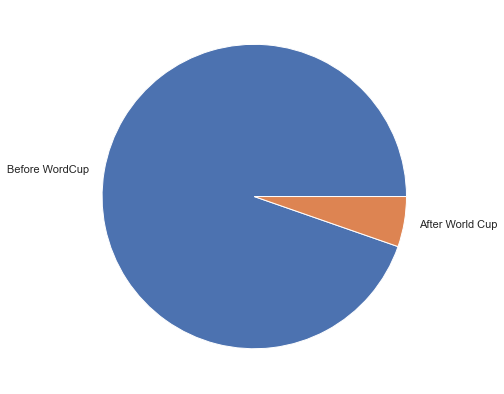

In [29]:
fig = plt.figure(figsize =(10, 7))
plt.pie([len(df)-len(df_recentAccounts),len(df_recentAccounts)], labels = ['Before WordCup','After World Cup'])

### What's the language of recent accounts ?

en     3066
es      803
de      219
ar      212
pt      209
und     193
fr      157
ja      153
in       86
hi       44
ko       25
th       21
it       16
ur        9
nl        8
tl        7
fa        7
tr        7
el        6
ht        5
vi        5
et        4
ne        3
pl        3
fi        2
ru        2
no        2
cs        1
ckb       1
hu        1
bn        1
da        1
lt        1
zh        1
Name: lang, dtype: int64
**************************************************


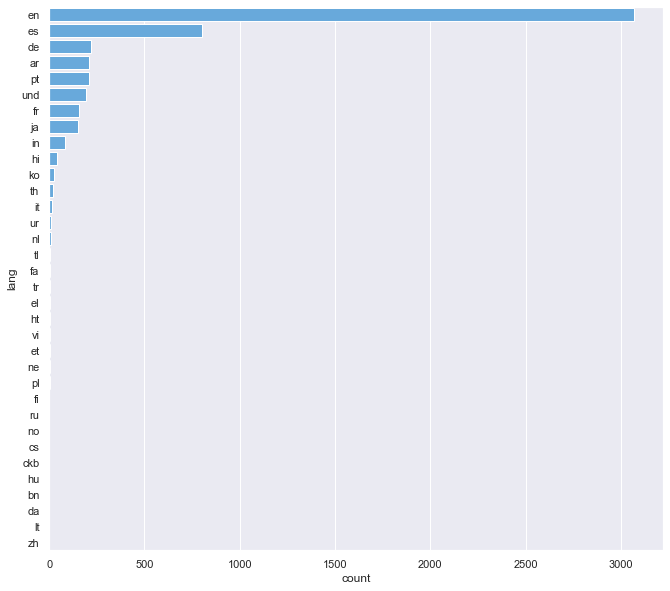

In [30]:
print(df_recentAccounts['lang'].value_counts())
cprint('*'*50,'blue')
plt.rcParams['figure.figsize'] = (11, 10)
countplot=sns.countplot(y='lang',data=df_recentAccounts,palette=color,order =df_recentAccounts['lang'].value_counts().index)

### What places did they tweet from the most ?

In [31]:
df_recentAccounts['location'].value_counts()[:20]

nan                        3455
Indonesia                    28
United States                28
Venezuela                    21
Pakistan                     13
India                        13
india                        12
Nigeria                      12
Iraq                         12
Qatar                        11
Lagos, Nigeria               11
Bangladesh                    9
Los Angeles                   9
Jawa Tengah, Indonesia        9
Maldives                      9
taekook solo stan🇳🇱           8
Marseille, France             8
Lahore, Pakistan              8
England, United Kingdom       8
New Delhi, India              8
Name: location, dtype: int64

### Most used source for tweeting ?

Android    3362
Web App    1147
Iphone      772
Name: source, dtype: int64
**************************************************


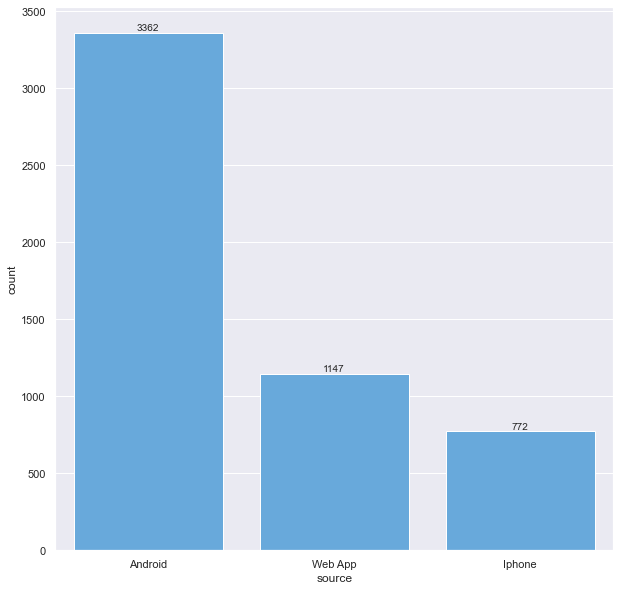

In [38]:
print(df_recentAccounts['source'].value_counts())
cprint('*'*50,'blue')
countplot=sns.countplot(x='source',data=df_recentAccounts,palette=color,order =df_recentAccounts['source'].value_counts().index)
for container in countplot.containers:
    countplot.bar_label(container)

### What was the maximum number of followers they could attract during the World Cup?

Max Followers Count :  43624
Mean Followers Count :  68
Min Followers Count :  0
**************************************************
Max Friends Count :  5004
Mean Friends Count :  232
Min Friends Count :  0
**************************************************


<AxesSubplot:xlabel='followers_count'>

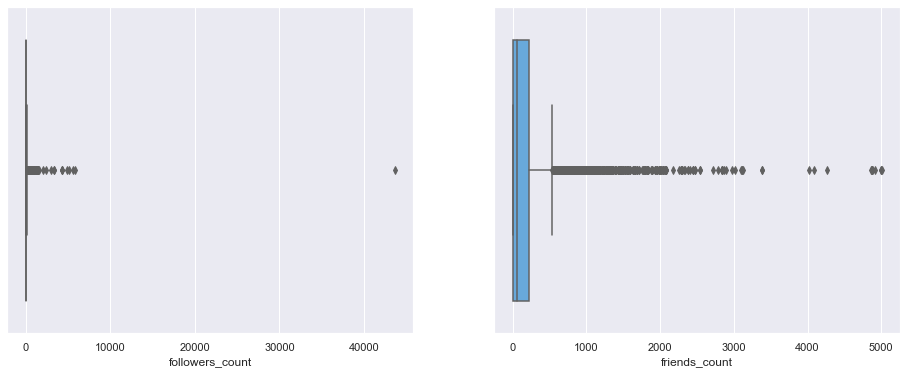

In [33]:
print('Max Followers Count : ',df_recentAccounts['followers_count'].max())
print('Mean Followers Count : ',round(df_recentAccounts['followers_count'].mean()))
print('Min Followers Count : ',df_recentAccounts['followers_count'].min())

cprint('*'*50,'blue')

print('Max Friends Count : ',df_recentAccounts['friends_count'].max())
print('Mean Friends Count : ',round(df_recentAccounts['friends_count'].mean()))
print('Min Friends Count : ',df_recentAccounts['friends_count'].min())

cprint('*'*50,'blue')

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(16,6))
sns.boxplot(x=df_recentAccounts["friends_count"],palette=color,ax=axis2)

sns.boxplot(x=df_recentAccounts["followers_count"],palette=color,ax=axis1)